# Why are so many things Gaussian distributed?
### Exploring the mystery behind the most common distribution in nature.
-------
*Autor: Bruno Muñoz Marcos*

*From the heights of people to fluctuations in the financial market to variability in experimental measurements, the normal distribution, also known as the Gaussian distribution, seems to be ubiquitous. This bell-shaped symmetry seems to describe countless phenomena in nature and society, but why is this the case? What is so special about this distribution that makes it the most common when dealing with real data?*

The answer to this question lies in a fascinating mix of statistical principles, properties of probability, and deep insights into how small random contributions accumulate in complex systems. In this article, we will explore why so many things in nature are normally distributed, delving into the rigorous mathematics of the normal distribution and the **Central Limit Theorem**, which underlies much of this statistical magic.

## Cases in nature where the Gaussian distribution occurs

- **Human heights and weights:** Most people are close to average height, with few people being very tall or very short.

- **Measurement errors:** In scientific experiments, errors are usually distributed around the true value.

- **Biological characteristics:** Size of leaves, lengths of limbs in animals, etc.

- **Electronic noise:** Random fluctuations in electrical circuits follow a normal distribution.

- **Astronomical phenomena:** Errors in the measurement of stellar distances or luminosities.

## Normal distribution:

The normal distribution is a continuous probability distribution used to model random variables that cluster around a mean value. It is commonly denoted as $N(\mu, \sigma)$ where:

- $\mu$ is the **mean** or **expected value** of the distribution.

- $\sigma$ is the **standard deviation**, which measures the **dispersion** of the data around the mean.

The probability density function of a random variable $X$ that follows a normal distribution is:
$$
f_X(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left( -\frac{1}{2} \left( \frac{x - \mu}{\sigma} \right)^2 \right), \quad x \in \mathbb{R}
$$

This function describes how the values of a continuous random variable are distributed, forming the characteristic "bell curve".



## The Central Limit Theorem:

The Central Limit Theorem is one of the pillars of probability and statistics. Simply stated, it states that:


*"If we sum a large number of independent and identically distributed random variables, regardless of their original distribution, the sum will tend to a normal distribution as the number of variables increases."*

Imagine you are rolling a fair six-sided die. The probability of getting any number between 1 and 6 is equal, i.e., the distribution is uniformly discrete. If you roll the die once, the result does not follow a normal distribution. However, if you roll the die 1000 times and add up the results, the distribution of the sum (or average) of these rolls will approach a normal distribution.

### Mathematical formulation:

Let $\{X_i\}_{i=1}^{n}$ be a sequence of independent and identically distributed random variables with:

- **Mean**: $ \mathbb{E}[X_i] = \mu $
- **Variance**: $\text{Var}(X_i) = \sigma^2 $, where $ 0 < \sigma^2 < \infty$

Think of these variables as independent measurements or samples from some process. For example, this could be the height of randomly selected people, the result of repeated dice rolls, or any other random process.

The sum of all these variables gives us an idea of the total or cumulative effect of all the random variables combined. However, the sum by itself doesn't give us a complete picture because it depends on both the number of variables n and their individual variances.
To make sense of this sum in a standardized way, we define a new variable:

$$
S_n = \frac{\sum_{i=1}^{n} X_i - n\mu}{\sigma \sqrt{n}}
$$

This is the **standardized** sum. Here's what's happening in this equation:

- **Numerator**: Is the sum of the variables, adjusted by subtracting the total mean. This centers the sum around zero.

- **Denominator**: Scales this adjusted sum by considering how the variability increases with the number of variables. This ensures that the sum is standardized, making it possible to compare sums of different sizes.


The magic of the Central Limit Theorem is captured in the next part:

$$
\lim_{n \to \infty} P(S_n \leq x) = \Phi(x)
$$

This statement means that as the number of variables n becomes very large, the distribution of the standardized sum $S_n$​ approaches the cumulative distribution of a standard normal distribution, $\phi (x)$.

In simpler terms:
- No matter what the original distribution of the random variables X as long as they have a finite mean and variance, the sum of these variables (when standardized) will approximate a normal distribution as n increases.
$$
\Phi(x) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{x} e^{-\frac{t^2}{2}} \, dt
$$
The function  $\phi (x)$ is the cumulative distribution function (CDF) of the standard normal distribution, which has a mean of 0 and a variance of 1. It tells us the probability that a standard normal variable is less than or equal to x.


## Verification of the Central Limit Theorem with Python:

To illustrate the Central Limit Theorem, we will implement a simulation in Python that shows how the sum of random variables converges to a normal distribution, regardless of the original distribution of the variables.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform

### Case 1: Uniform Variables

This code generates sums of uniform random variables, standardizes them and then plots histograms of these sums for different sample sizes, showing how the distribution approaches normal as the number of variables increases.

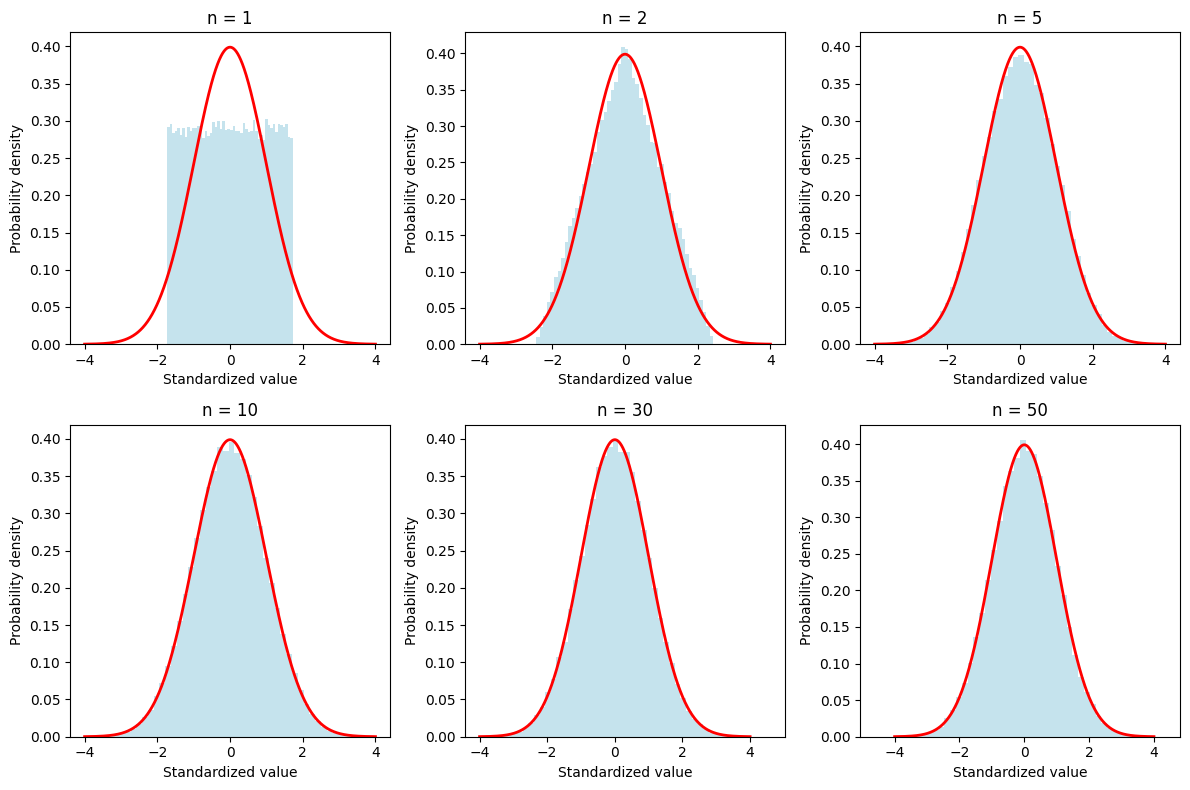

In [6]:
# Parameter settings
num_variables = [1, 2, 5, 10, 30, 50]
sample_size = 100000  

plt.figure(figsize=(12, 8))

for i, n in enumerate(num_variables):
    # Generate uniform random variables between 0 and 1
    variables = np.random.uniform(0, 1, (sample_size, n))
    
    # Calculate the sum of the random variables for each sample
    sum_variables = np.sum(variables, axis=1)
    
    # Standardize the sums
    mean = n * 0.5  # Mean of the uniform U(0,1)
    std_dev = np.sqrt(n * (1/12))  # Variance of the uniform U(0,1)
    standardized_sum = (sum_variables - mean) / std_dev
    
    # Plot the histogram of the standardized sums
    plt.subplot(2, 3, i+1)
    counts, bins, ignored = plt.hist(standardized_sum, bins=50, density=True, color='lightblue', alpha=0.7)
    
    # Curve of the standard normal distribution
    x = np.linspace(-4, 4, 1000)
    plt.plot(x, norm.pdf(x), 'r', linewidth=2)
    
    plt.title(f'n = {n}')
    plt.xlabel('Standardized value')
    plt.ylabel('Probability density')

plt.tight_layout()
plt.savefig('CLT_VA')
plt.show()


We note that, as 𝑛 increases, the distribution of the standardized sums becomes closer and closer to the standard normal distribution.

### Case 2: Exponential Variables

In this case, the code generates sums of exponential random variables which are asymmetric and not symmetric like the uniform distribution.

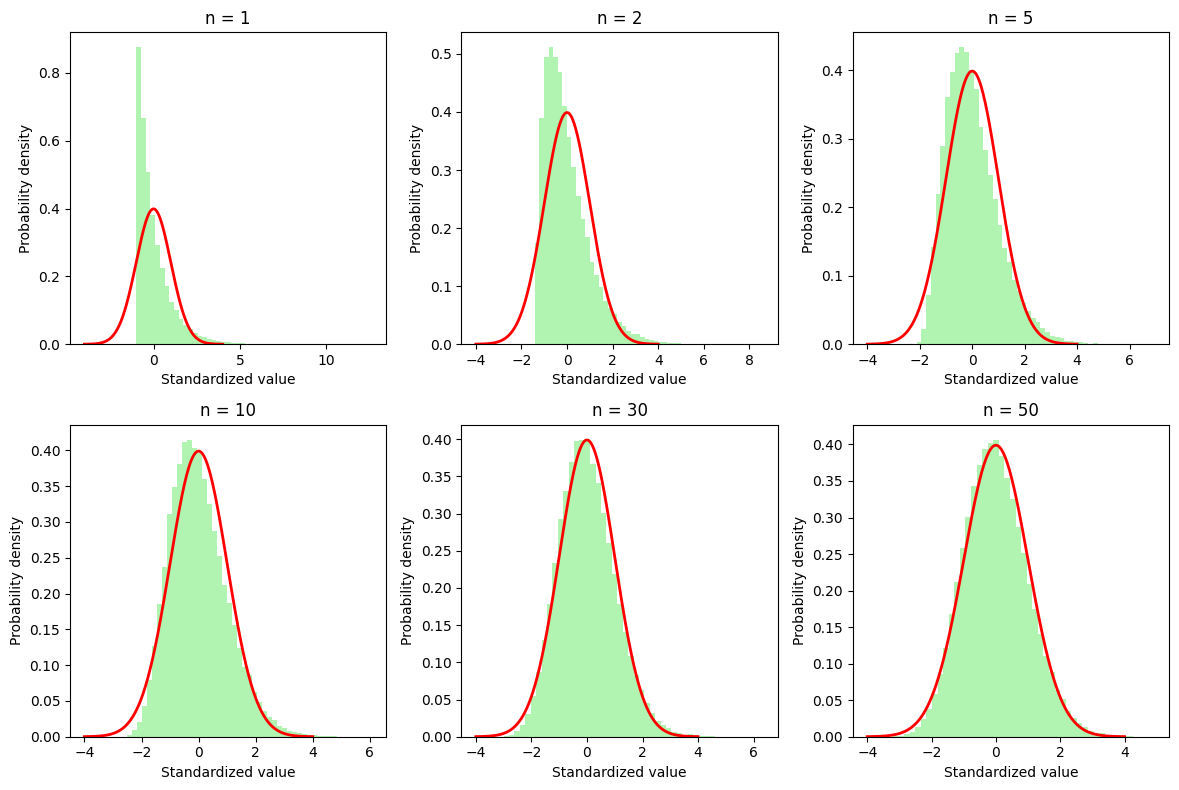

In [7]:
# Parameter settings
num_variables = [1, 2, 5, 10, 30, 50]
sample_size = 100000  
lambda_param = 1  

plt.figure(figsize=(12, 8))

for i, n in enumerate(num_variables):
    # Generate exponential random variables
    variables = np.random.exponential(1/lambda_param, (sample_size, n))
    
    # Calculate the sum of the random variables for each sample
    sum_variables = np.sum(variables, axis=1)
    
    # Standardize the sums
    mean = n * (1/lambda_param)  # Mean of the exponential
    std_dev = np.sqrt(n * (1/lambda_param)**2)  # Variance of the exponential
    standardized_sum = (sum_variables - mean) / std_dev
    
    # Plot the histogram of the standardized sums
    plt.subplot(2, 3, i+1)
    counts, bins, ignored = plt.hist(standardized_sum, bins=50, density=True, color='lightgreen', alpha=0.7)
    
    # Curve of the standard normal distribution
    x = np.linspace(-4, 4, 1000)
    plt.plot(x, norm.pdf(x), 'r', linewidth=2)
    
    plt.title(f'n = {n}')
    plt.xlabel('Standardized value')
    plt.ylabel('Probability density')

plt.tight_layout()
plt.savefig('CLT_EXP')
plt.show()


Although the exponential distribution is highly asymmetric, the standardized sums converge to the normal distribution as 𝑛 increases, illustrating the robustness of the Central Limit Theorem.

### Case 3: Cauchy distribution

The Cauchy distribution is a continuous distribution given by the probability density function:
$$
f(x) = \frac{1}{\pi \left(1+x^2\right)} , \quad x \in \mathbb{R}
$$

This distribution has heavy tails, which means that its integral for both the mean and the variance diverge. In other words:

- The **mean** of the Cauchy distribution does not exist because the integral $ \int_{-\infty}^{\infty} x f(x) \, dx $ does not converge.

- The **variance** also does not exist because the integral $ \int_{-\infty}^{\infty} (x - \mu)^2 f(x) \, dx $ also diverges.

Since neither the mean nor the variance are defined for a Cauchy distribution, the necessary conditions of the classic Central Limit Theorem (CLT) are not satisfied.



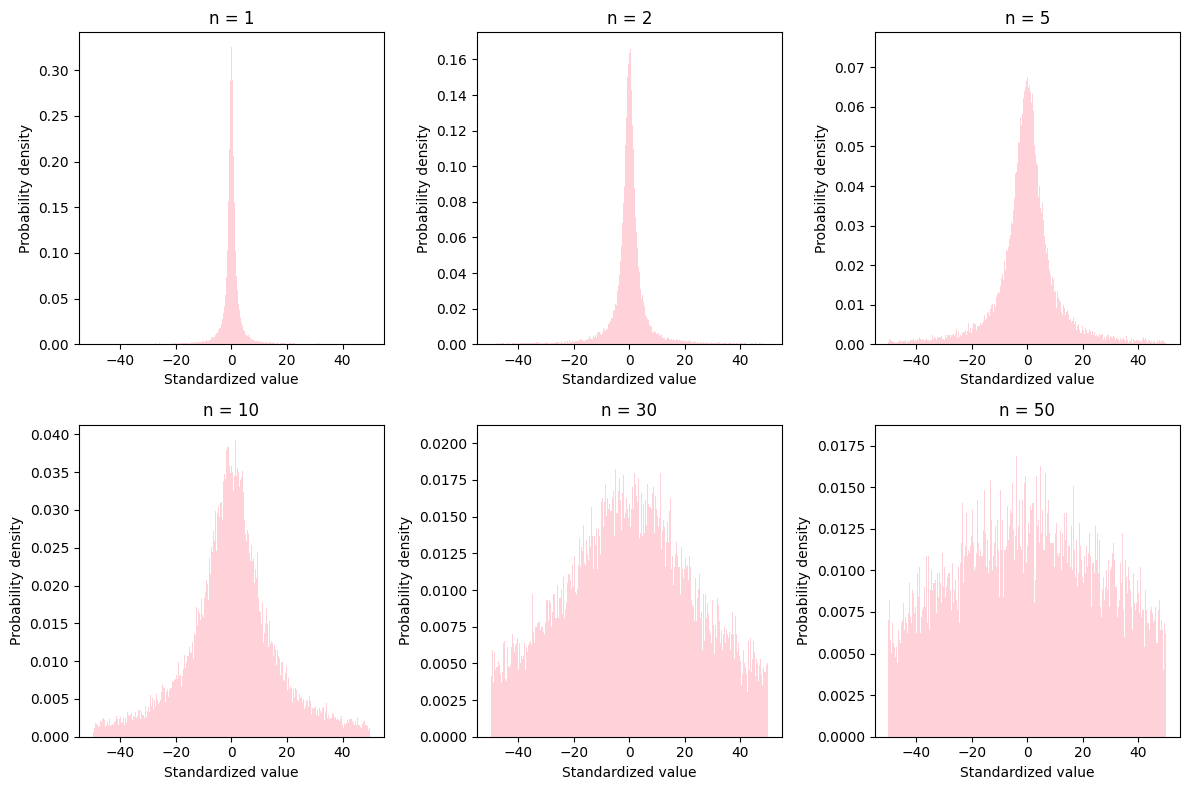

In [4]:
# Parameter settings
num_variables = [1, 2, 5, 10, 30, 50]
sample_size = 100000  

plt.figure(figsize=(12, 8))

for i, n in enumerate(num_variables):
    # Generate Cauchy random variables
    variables = np.random.standard_cauchy((sample_size, n))
    
    # Calculate the sum of the random variables for each sample
    sum_variables = np.sum(variables, axis=1)
    
    # We cannot standardize due to infinite variance
    
    # Plot the histogram of the sums
    plt.subplot(2, 3, i+1)
    plt.hist(sum_variables, bins=1000, range=(-50, 50), density=True, color='pink', alpha=0.7)
    
    plt.title(f'n = {n}')
    plt.xlabel('Standardized value')
    plt.ylabel('Probability density')

plt.tight_layout()
plt.savefig('CLT_var')
plt.show()


## The Central Limit Theorem and Diffusion Processes: A Connection to Physics

So far, we have discussed how the Central Limit Theorem (CLT) is fundamental to understanding why sums of random variables tend to a normal distribution under certain conditions. This property is powerful not only in statistics, but also in various fields of physics. One of the most fascinating applications of the CLT is in the study of **diffusion processes**, specifically in **Brownian motion**.


### Brownian Motion and Diffusion

In physics, Brownian motion describes the random movement experienced by a particle suspended in a fluid, such as water or air. This motion results from the countless collisions between the particle and the molecules of the surrounding fluid. Each of these collisions propels the particle in random directions, producing small and unpredictable displacements.



Imagine this process in terms of the CLT:



- Each small collision is analogous to a random variable that slightly changes the position of the particle. 

- Although each individual collision does not necessarily follow a normal distribution, the particle's position after many collisions is the sum of all these small random contributions.

- Therefore, as the CLT predicts, the distribution of the particle's final position tends to a normal distribution as the number of collisions increases.



This behavior gives rise to what is known as a **Wiener process** or **Brownian motion**, which is a continuous stochastic process where the increments are normal and distributed with a zero mean and variance proportional to the elapsed time. This connection illustrates how the CLT explains the behavior of particles on a microscopic level in macroscopic terms.

### Practical Example with Python Code

To illustrate how the CLT manifests in a physical process like Brownian motion, we will simulate a particle experiencing a series of random movements in one dimension. We will observe how, as we increase the number of random steps, the particle's final position follows a normal distribution.







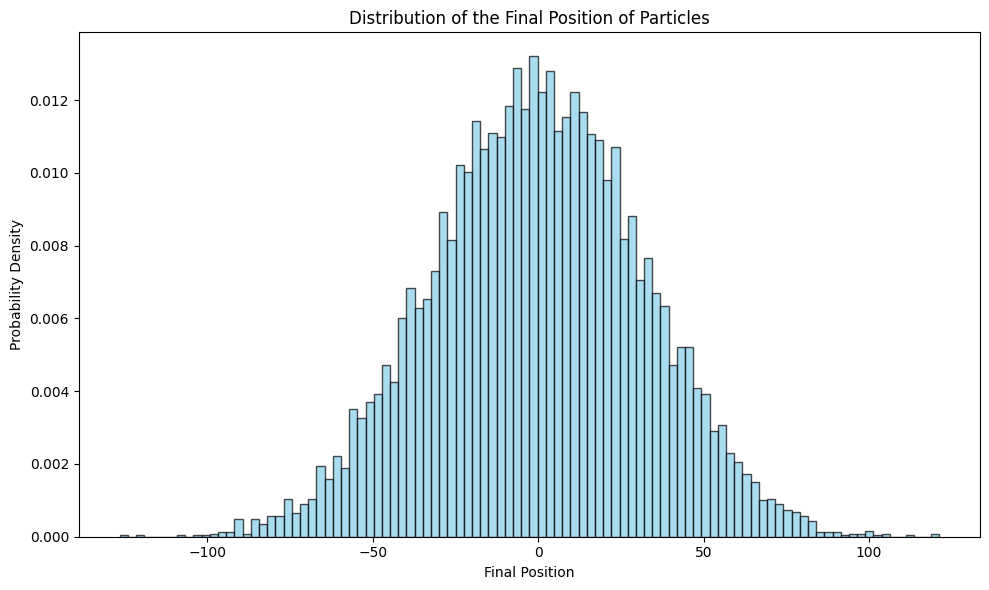

In [5]:
# Parameter settings
num_particles = 10000 
num_steps = 1000  
step_size = 1  

# Simulation of Brownian motion

# Each step is a random variable with a normal distribution (mean = 0, variance = 1)
steps = np.random.normal(loc=0, scale=step_size, size=(num_particles, num_steps))

# Cumulative sum of steps to get the final position
final_positions = np.sum(steps, axis=1)

# Visualization
plt.figure(figsize=(10, 6))
plt.hist(final_positions, bins=100, density=True, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Distribution of the Final Position of Particles')
plt.xlabel('Final Position')
plt.ylabel('Probability Density')
plt.tight_layout()
plt.savefig('TCL_pys')
plt.show()


This code shows how, even if each individual step of a particle is random and small, the sum of many such steps (the final position) results in a distribution that approximates a normal one. This simulation is a practical way to observe how Brownian motion, despite being the result of countless random collisions, can be modeled with a normal distribution due to the Central Limit Theorem.

The beauty of the Central Limit Theorem lies in its universality and how it connects the random world with the regularity and order we observe. It is a powerful reminder that, in the midst of apparent chaos, there are mathematical laws that govern and explain the patterns that emerge in our universe.